## ORIE 5580/5581: Homework 4

### Bowen Gao (bg453), David Lee (dyl44)

### Problem 1

#### (a)

The $95\%$ confidence interval for the probability is as follows. The true probability is $P(X > 24.02) = 1 - P(X \leq 24.02) = 0.208,$ and we can see that this probability is contained within the confidence interval.

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [51]:
# pilot run
l = 0.005
CA_test = np.random.normal(23.81, 0.15, 100)
measure_CA_test = CA_test + np.random.normal(0, 0.21, 100)
result_test = measure_CA_test > 24.02
test_var = np.var(result_test, ddof = 1)
N = np.ceil(test_var * (scipy.stats.norm.ppf(0.975)/l) ** 2)
print (N)

20861.0


In [52]:
N = int(N)
CA = np.random.normal(23.81, 0.15, N)
measure_CA = CA + np.random.normal(0, 0.21, N)
result = measure_CA > 24.02
var = np.var(result, ddof = 1)
LB = np.mean(result) - scipy.stats.norm.ppf(0.975)*np.sqrt(var/N)
RB = np.mean(result) + scipy.stats.norm.ppf(0.975)*np.sqrt(var/N)
print (LB, RB)

(0.20595343054994203, 0.21703683837292842)


#### (b)

The $95\%$ confidence interval for the probability is as follows.

In [54]:
#pilot run
l = 0.005
CA_test = np.random.normal(23.81, 0.15, 100)
measure_CA_test1 = CA_test + np.random.normal(0, 0.21, 100)
measure_CA_test2 = CA_test + np.random.normal(0, 0.21, 100)
result_test = np.empty(100)
for i in range(100):
    if  (measure_CA_test1[i] <= 24.02) or (measure_CA_test2[i] <= 24.02):
        result_test[i] = 1
    else:
        result_test[i] = 0
test_var = np.var(result_test, ddof = 1)
N = np.ceil(test_var*(scipy.stats.norm.ppf(0.975)/l)**2)
print (N)

12712.0


In [55]:
N = int(N)
CA = np.random.normal(23.81, 0.15, N)
measure_CA1 = CA + np.random.normal(0, 0.21, N)
measure_CA2 = CA + np.random.normal(0, 0.21, N)
result = np.empty(N)
for i in range(N):
    if  (measure_CA1[i] <= 24.02) or (measure_CA2[i] <= 24.02):
        result[i] = 1
    else:
        result[i] = 0
var = np.var(result, ddof = 1)
LB = np.mean(result) - scipy.stats.norm.ppf(0.975)*np.sqrt(var/N)
RB = np.mean(result) + scipy.stats.norm.ppf(0.975)*np.sqrt(var/N)
print (LB, RB)

(0.92231393842418508, 0.9313676223058337)


#### (c)

The estimated probability that a Canadian quarter will be accepted by the vending machine as a U.S. quarter within 2 tries is as follows.

In [6]:
N = 10000
mean = (23.81, 1.58)
cov = [[0.15**2, -0.5*0.15*0.1], [-0.5*0.15*0.1, 0.1**2]]
CA = np.random.multivariate_normal(mean, cov, N)
CA_d1 = CA[:, 0] + np.random.normal(0,0.21,N)
CA_t1 = CA[:, 1] +np.random.normal(0,0.05,N)
CA_d2 = CA[:, 0] + np.random.normal(0,0.21,N)
CA_t2 = CA[:, 1] +np.random.normal(0,0.05,N)
results1 = np.empty(N)
for i in range(N):
    if (CA_d1[i] > 24.02 and CA_t1[i] > 1.68) or (CA_d2[i] > 24.02 and CA_t2[i] > 1.68):
        results1[i] = 1
    else:
        results1[i] = 0

results2 = np.empty(N)

prob = np.mean(results1)
print ("The estimated probability is", prob)

The estimated probability is 0.0403


### Problem 2

Suppose that we want to generate a random variable $X$ whose density function is 

$$f(x) = \frac{1}{2} x^2 e^{-x}, \text{ for } x > 0$$

by using the acceptance-rejection method with an exponential density having rate $\lambda$.

#### (a)

For $x > 0$, we have $f(x)$ and $g(x) = \lambda e^{-\lambda x}$. We know that

$$\frac{1}{2} x^2 e^{-x} \leq M \lambda e^{-\lambda x} \Rightarrow M \geq \frac{1}{2\lambda} x^2 e^{(\lambda - 1)x}.$$

Let us define $h(x) = \frac{1}{2\lambda} x^2 e^{(\lambda - 1)x}.$ Then,

\begin{align*}
h'(x) &= \frac{1}{2 \lambda} \bigg( xe^{(\lambda - 1) x} \cdot ((\lambda - 1) x + 2) \bigg) = 0 \\
&\Rightarrow x^* = \frac{2}{1 - \lambda}.
\end{align*}

We can see that $h(x)$ is maximized at $x^* = \frac{2}{1 - \lambda}$ and thus the number of expected samples needed for each accepted sample is

\begin{align*}
h(x^*) &= \frac{1}{2\lambda} \bigg( \frac{2}{1 - \lambda} \bigg)^2 e^{(\lambda - 1)(2 / (1 - \lambda))} \\
&= \frac{1}{2\lambda} \bigg( \frac{2}{1 - \lambda} \bigg)^2 e^{-2} \\
&= \frac{2e^{-2}}{\lambda (1 - \lambda)^2}.
\end{align*}

#### (b)

Now, we find the $\lambda$ that minimizes $h(x^*),$ and so

\begin{align*}
h'(x^*) &= 2e^{-2} \bigg( \frac{1 - 3\lambda}{(\lambda - 1)^3 \lambda^2} \bigg) = 0 \\
&\Rightarrow 1 - 3\lambda = 0 \\
&\Rightarrow \lambda = \frac{1}{3}.
\end{align*}

Therefore, the value of $\lambda$ that minimizes the expected number of iterations of the algorithm used to generate $X$ is 1/3.

### Problem 3

Let the random variable $X$ have the density

$$
f(x) = 
\begin{cases}
(5x^4 + 4x^3 + 1) / 3 &\text{ for } 0 \leq x \leq 1, \\
0 &\text{ otherwise.}
\end{cases}
$$

#### (a)

Let's assume that $M$ is the upper bound on the p.d.f. of $X$: 

$$M \geq \max_{x \in [0, 1]} f(x).$$

Since $f'(x) > 0$ over $x \in [0, 1]$, we can set $M = 10 / 3.$ Thus, the acceptance-rejection method is as follows:

1. Generate $U_1 \sim U[0, 1], U_2 \sim U[0, 1].$
2. Set $Z_1 = U_1$ and $Z_2 = \frac{10}{3}U_2.$
3. If $Z_2 \leq \frac{1}{3}(5U_1^4 + 4U_1^3 + 1)$, return $X = U_1$; else go to step 1.

#### (b)

Since the acceptance probability (success) is $p = 1 / M$, the number of samples needed will follow a geometric distribution with probability $p$. Given that the mean of the distribution is $1 / p = M$, the number of samples that the AR algorithm would need in order to generate one sample of $X$ is $2M = 20/3$, on average.

#### (c)

Now, we use our algorithm in (a) to generate 2,500 samples of $X$. Then, we plot a histogram of our sample and compare it against the true pdf. We can see that both the histogram and pdf have a similar shape. 

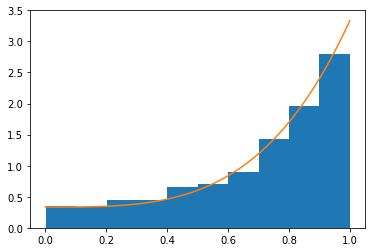

In [57]:
def AC(a = 0, b = 1, M = 10./3.):
    stop = 0
    while stop == 0:
        U1 = np.random.uniform(0, 1)
        U2 = np.random.uniform(0, 1)
        Z1 = a + (b - a)*U1
        Z2 = M * U2
        if Z2 <= (5 * Z1 ** 4 + 4 * Z1 ** 3 + 1) / 3.:
            stop = 1
            return Z1

results = np.empty(2500)
for i in range(2500):
    results[i] = AC()
plt.hist(results, normed = 1)
x = np.linspace(0, 1, 1000)
fx = (5 * x ** 4 + 4 * x ** 3 + 1) / 3.
plt.plot(x, fx)
plt.show()

### Problem 4

#### (a)

The estimates of the 10th percentile, median, and 90th percentile of the total cost of sourcing the wood chips needed to satisfy MDF demand are 98,560, 98,560, and 120,200, respectively. An estimate and a $95\%$ confidence interval for the expected total cost of sourcing the wood chips are reported below.

In [58]:
import numpy as np

def cost_of_demand ():
    big = np.random.binomial(2, 0.4)
    small = np.random.binomial(10, 0.5)
    demand = 4000 + big * 2500 + small * 200
    if (demand <= 8000):
        return 98560
    elif (demand > 8000 and demand <= 10000 ):
        if (demand > 8000 and demand <= 8400):
            return 98560 + (demand - 8000) * 10
        elif (demand > 8400 and demand <= 9000):
            return 98560 + 400 * 10 + (demand - 8400) * 11.2
        elif (demand > 9000 and demand <= 9400):
            return 98560 + 400 * 10 + 600 * 11.2 + (demand - 9000) * 12.3
        else:
            return 98560 + 400 * 10 + 600 * 11.2 + 400 * 12.3 + (demand - 9400) * 15
    else:
        return 123200 + (demand - 10000) * np.random.triangular(16, 20, 30)
    
res = [cost_of_demand() for i in range(100000)]
sorted_res = sorted(res)
tenth = sorted_res[9999]
median = np.median(sorted_res)
ninetieth = sorted_res[89999]
print tenth, median, ninetieth

98560 98560.0 120200.0


In [59]:
import scipy.stats

print ("The expected total cost of wood chip supply is", np.mean(res))

var = np.var(res, ddof = 1)
LB = np.mean(res) - scipy.stats.norm.ppf(0.975) * np.sqrt(var/100000)
RB = np.mean(res) + scipy.stats.norm.ppf(0.975) * np.sqrt(var/100000)
print ("The 95% confidence interval is", LB, RB)

('The expected total cost of wood chip supply is', 102673.66501587623)
('The 95% confidence interval is', 102613.99589919548, 102733.33413255699)


#### (b)

The minimum expected demand is $4000+5000\times0.4+2000\times0.5 = 7000$. Thus, Fingerlakes should should set up a contract with **Elmira Road Millers, Horseheads Mill, and Cortland Star**, and buy the extra (if needed) on the market.

In [60]:
# import numpy as np
# import scipy.stats

def demand ():
    big = np.random.binomial(2, 0.4)
    small = np.random.binomial(10, 0.5)
    return 4000 + big * 2500 + small * 200
    
demand = [demand() for i in range(10000)]
expected_demand = np.mean(demand)
print expected_demand
var_demand = np.var(demand, ddof = 1)
LB = np.mean(demand) - scipy.stats.norm.ppf(0.975) * np.sqrt(var_demand/10000)
RB = np.mean(demand) + scipy.stats.norm.ppf(0.975) * np.sqrt(var_demand/10000)
print 'The 95% confidence interval is', LB, RB

7050.42
The 95% confidence interval is 7015.74731877 7085.09268123


By simulating a 10000 times, we can get the same conclusion.

In [61]:
print "The expected chip supply cost is", 2000*10+3000*11.2+2000*12.3

The expected chip supply cost is 78200.0
